<a href="https://colab.research.google.com/github/kanigaaPB/KanigaaPB/blob/main/gas_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_csv('chemicals_in_wind_tunnel.csv')


df.head()


df.info()


df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Columns: 290 entries, Unnamed: 0 to Chemical
dtypes: float64(288), int64(1), object(1)
memory usage: 1.8+ MB


,0
Unnamed: 0,0
mean_A1,0
mean_A2,0
mean_A3,0
mean_A4,0
...,...
max_I5,1
max_I6,1
max_I7,1
max_I8,1


In [ ]:
df=df.dropna();


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42),
    "SVM": SVC(kernel='linear', C=0.5),
    "KNN": KNeighborsClassifier(n_neighbors=12),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

accuracy_results = {}


==================== Random Forest ====================
Accuracy: 100.00%
                  precision    recall  f1-score   support

Acetaldehyde_500       1.00      1.00      1.00       167

        accuracy                           1.00       167
       macro avg       1.00      1.00      1.00       167
    weighted avg       1.00      1.00      1.00       167



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


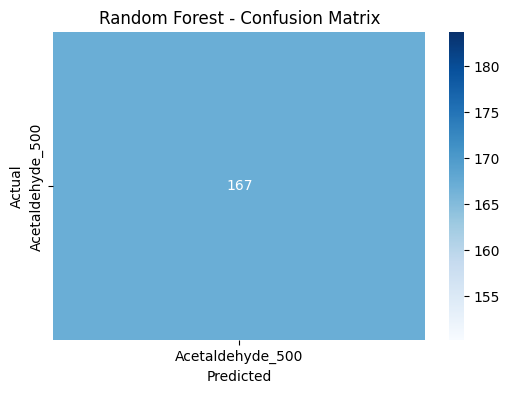

ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc

    print(f"\n==================== {name} ====================")
    print(f"Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


